#Продвинутый Python, ДЗ-3

Правила игры:

В домашке 8 задач, разбаловка указана в задании. Суммарно за дз можно получить 100 баллов, что равняется 10 баллам

Дедлайн - 7 дней после выдачи дз. Необходимо залить решеннный ноутбук в github и прислать ссылку в Anytask (без выполнения любого из пунктов работа проверяться не будет)

В данной домашке нужно рисовать графики с помощью matplotlib или же seaborn. Обратите внимание, что все графики и оси должны быть подписаны, графики должны выглядеть аккуратно (за это будем штрафовать)

## Данные

В этом домашнем задании вам придется оказаться на месте аналитика в бразильском маркетплейсе [Olist](https://olist.com/pt-br/). Вам необходимо исследовать данные и на их основании сделать выводы, которые помогут бизнесу расцветать!

Данные находятся тут в файле archive.zip

In [2]:
!pip install wget

You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import wget

url = 'https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip'
filename = wget.download(url)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./')

customers = pd.read_csv('olist_customers_dataset.csv')
location = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

Ван дано 9 датасетов, которые содержат в себе все данные по 100 000 заказам со всей Бразилии. Чтобы облегчить вам жизнь, вот связи по этим датасетам (файл product_category_name_translation является переводом названий категорий с португальского на английский)

![](https://i.imgur.com/HRhd2Y0.png)

Ну что же, начнем!

## Задание 1 (20 баллов)

Визуализируйте зависимость между средним числом покупок товара и:

* числом фотографий товара

* кол-во символов в описании товара (аггрегируйте с шагом 20)

* кол-во символов в названии (аггрегируйте с шагом 5)

Для подсчета среднего числа покупок нужно посчитать по каждому товару число продаж, а затем взять среднее от него (учтите, что мы считаем только доставленные заказы)

In [4]:
prod1 = orders[orders['order_status'] == 'delivered']
prod1 = pd.merge(prod1, items, how = 'inner', on="order_id")
prod1=prod1.groupby(["product_id"]).agg({"order_id":"count"}).reset_index()
res1=pd.merge(prod1, products, how="inner", on="product_id")

res1["product_description_lenght"]=res1["product_description_lenght"]//20
res1["product_name_lenght"]=res1["product_name_lenght"]//5

res1_photos=res1.groupby("product_photos_qty").agg({"order_id":"mean"}).reset_index()
res1_desc=res1.groupby("product_description_lenght").agg({"order_id":"mean"}).reset_index()
res1_name=res1.groupby("product_name_lenght").agg({"order_id":"mean"}).reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_20160\1943182559.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  line11=sns.barplot(data=res1_photos, x='product_photos_qty', y='order_id', palette=sns.color_palette("Spectral", n_colors=19))
C:\Users\User\AppData\Local\Temp\ipykernel_20160\1943182559.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  line12=sns.barplot(data=res1_desc, y='order_id', x='product_description_lenght', width=0.5, palette=sns.color_palette("Spectral", n_colors=201))
C:\Users\User\AppData\Local\Temp\ipykernel_20160\1943182559.py:14: UserWarning: The palette list has more values (201) than needed (200), which may not be intended.
  line12=sns.barplot(data=res1_desc, y='order_id', x='produc

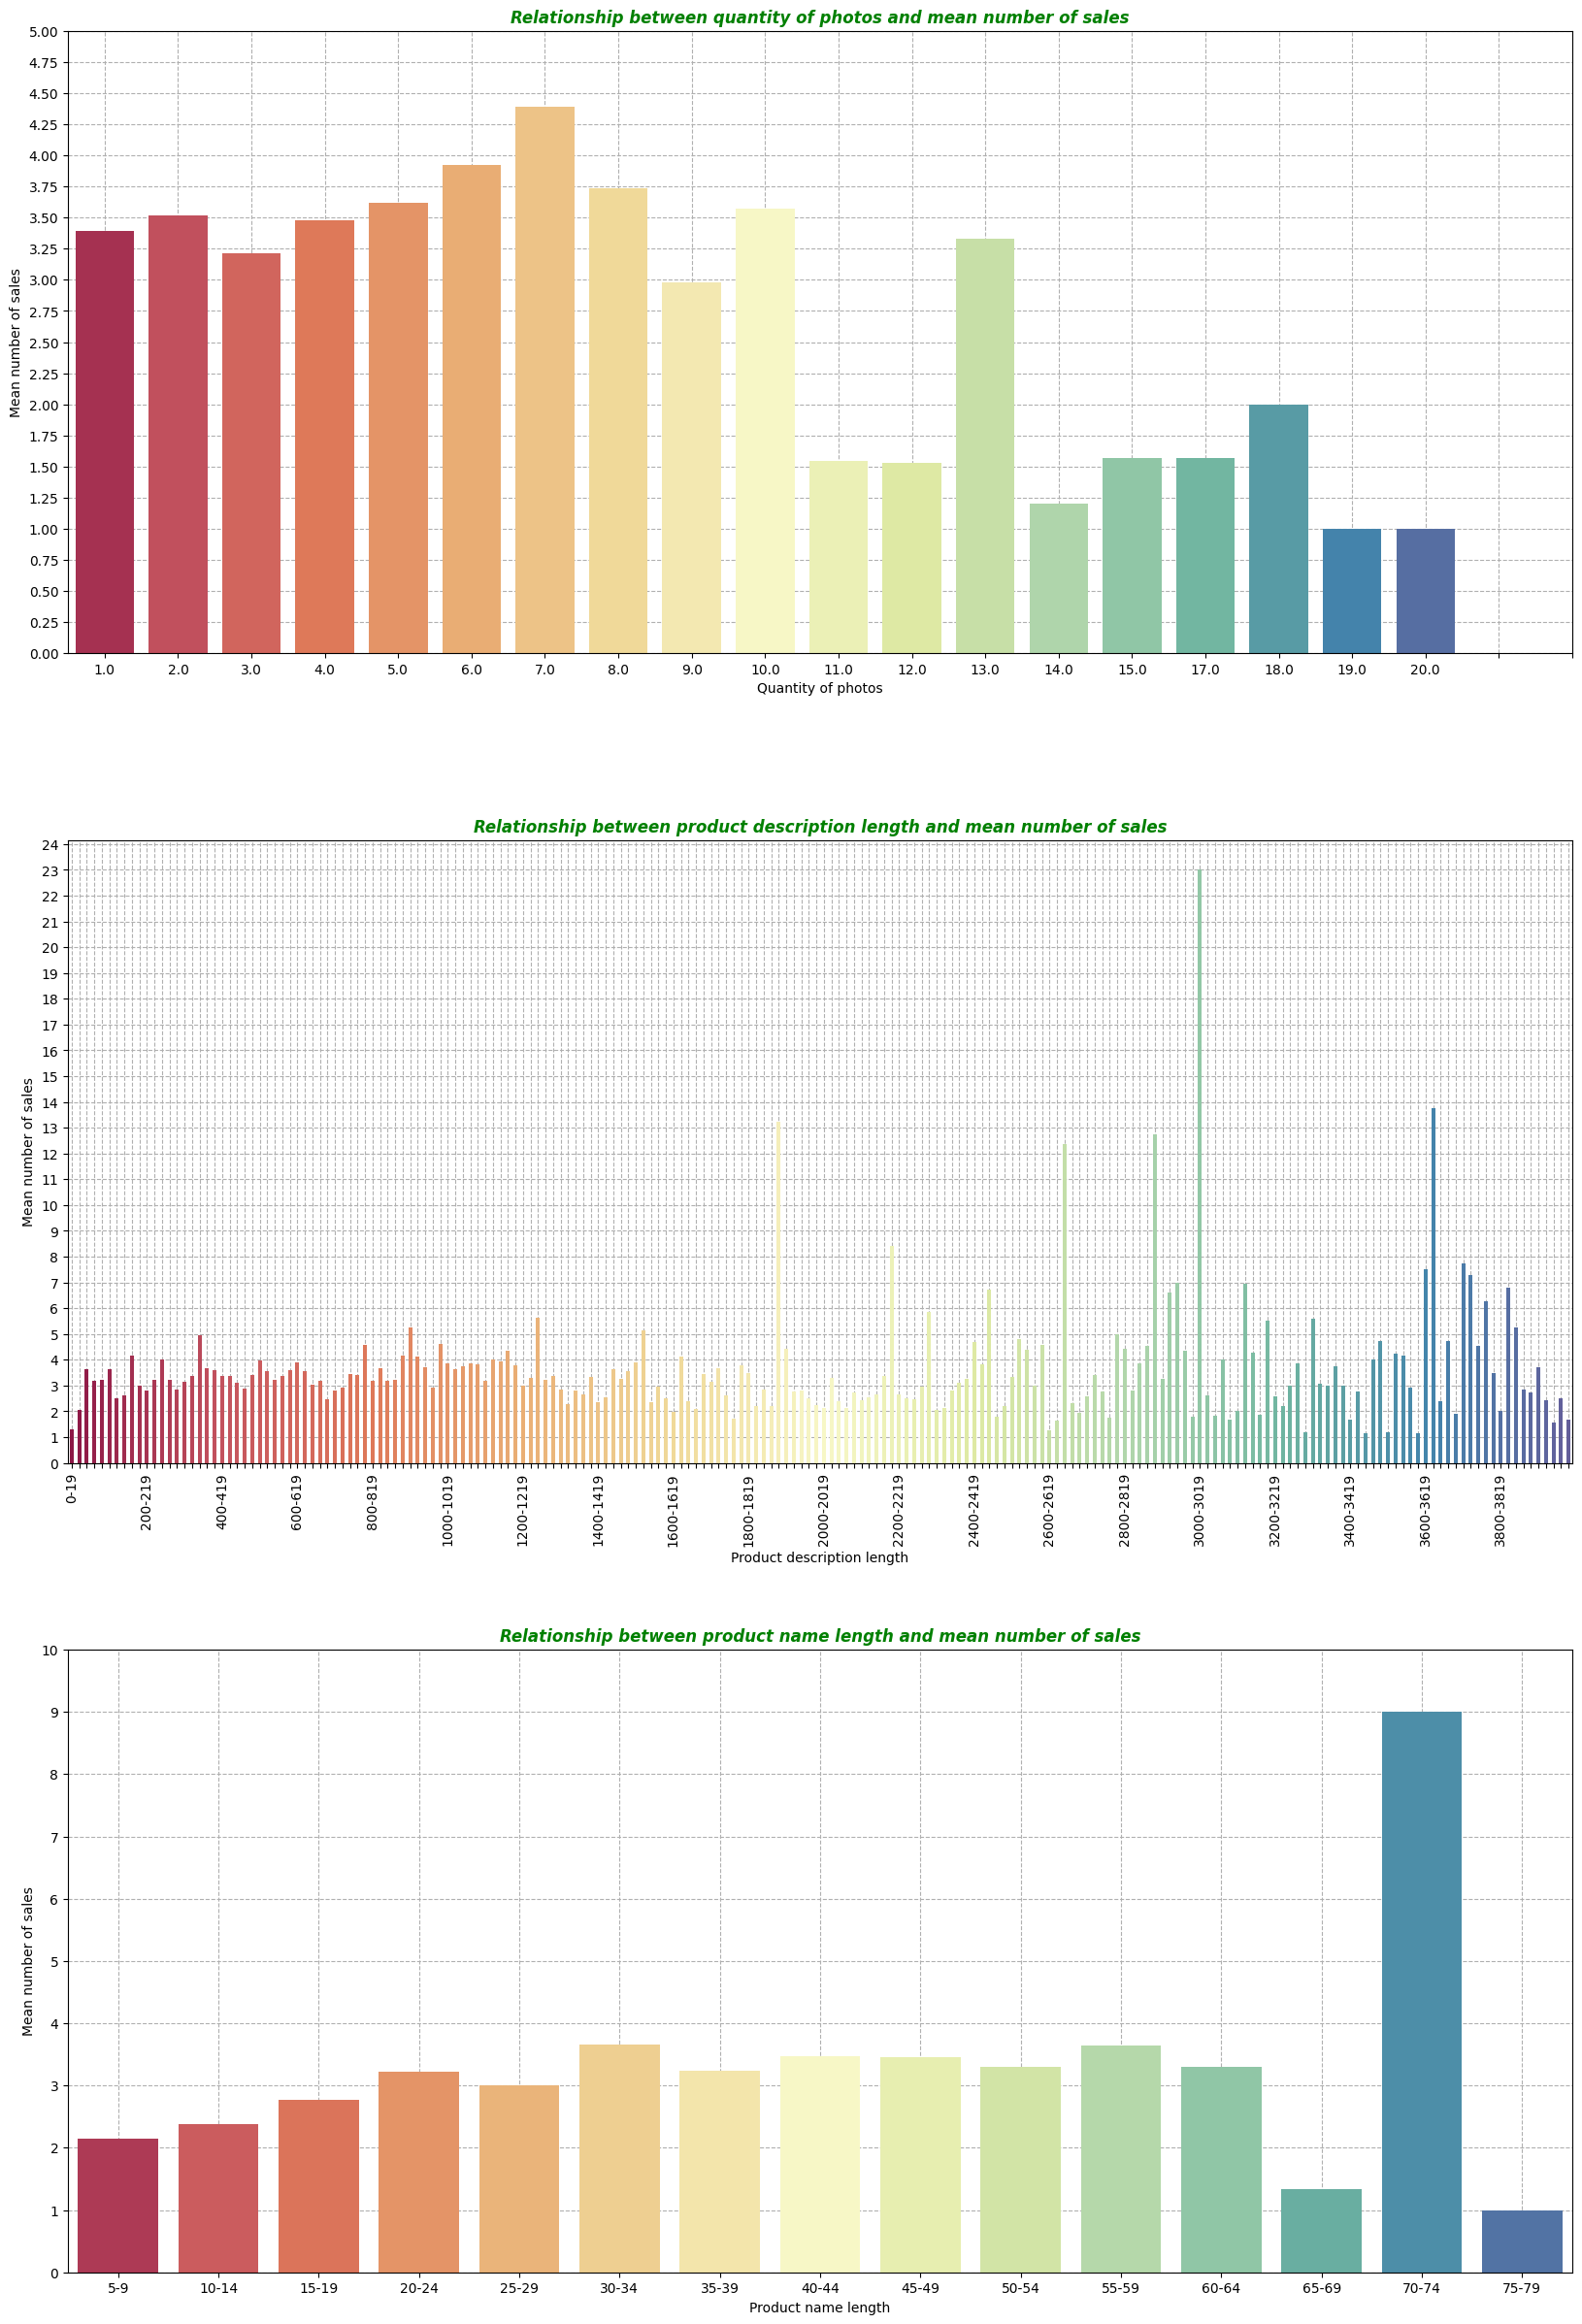

In [11]:
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.3)

plt.subplot(311)
line11=sns.barplot(data=res1_photos, x='product_photos_qty', y='order_id', palette=sns.color_palette("Spectral", n_colors=19))
line11.set_title("Relationship between quantity of photos and mean number of sales", fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
line11.set(xlabel="Quantity of photos", ylabel="Mean number of sales")
line11.set_xticks([i for i in range(0, 21)])
line11.set_yticks([i/4 for i in range(0, 21)])
line11.set_axisbelow(True)
line11.grid(linestyle="dashed")

plt.subplot(312)
line12=sns.barplot(data=res1_desc, y='order_id', x='product_description_lenght', width=0.5, palette=sns.color_palette("Spectral", n_colors=201))
line12.set_title("Relationship between product description length and mean number of sales", fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
line12.set(ylabel="Mean number of sales", xlabel="Product description length")
line12.set_axisbelow(True)
line12.grid(linestyle="dashed")

line12.set_xticklabels([f"{i*20}-{(i+1)*20-1}" for i in range(0, 200)])
line12.set_xticklabels(line12.get_xticklabels(), rotation=90)
line12.set_yticks([i for i in range(0, 25)])
for ind, label in enumerate(line12.get_xticklabels()):
    if ind % 10 == 0: 
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.subplot(313)
line13=sns.barplot(data=res1_name, y='order_id', x='product_name_lenght', palette=sns.color_palette("Spectral", n_colors=15))
line13.set_title("Relationship between product name length and mean number of sales", fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
line13.set(ylabel="Mean number of sales", xlabel="Product name length")
line13.set_axisbelow(True)
line13.grid(linestyle="dashed")

line13.set_xticklabels([f"{i*5}-{(i+1)*5-1}" for i in range(1, 16)])
line13.set_yticks([i for i in range(0, 11)])

plt.show()

## Задание 2 (10 баллов)

Отобразите среднюю сумму оплаты по типу оплаты (для этого вам нужна табличка payments)

C:\Users\User\AppData\Local\Temp\ipykernel_20160\2336921060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar2=sns.barplot(data=res, y="payment_type", x="payment_value", palette=sns.color_palette("Spectral", n_colors=4))
C:\Users\User\AppData\Local\Temp\ipykernel_20160\2336921060.py:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  bar2=sns.barplot(data=res, y="payment_type", x="payment_value", palette=sns.color_palette("Spectral", n_colors=4))
C:\Users\User\AppData\Local\Temp\ipykernel_20160\2336921060.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar2.set_yticklabels(["Credit card", "Boleto", "Debit card", "Voucher", "Not defined"])


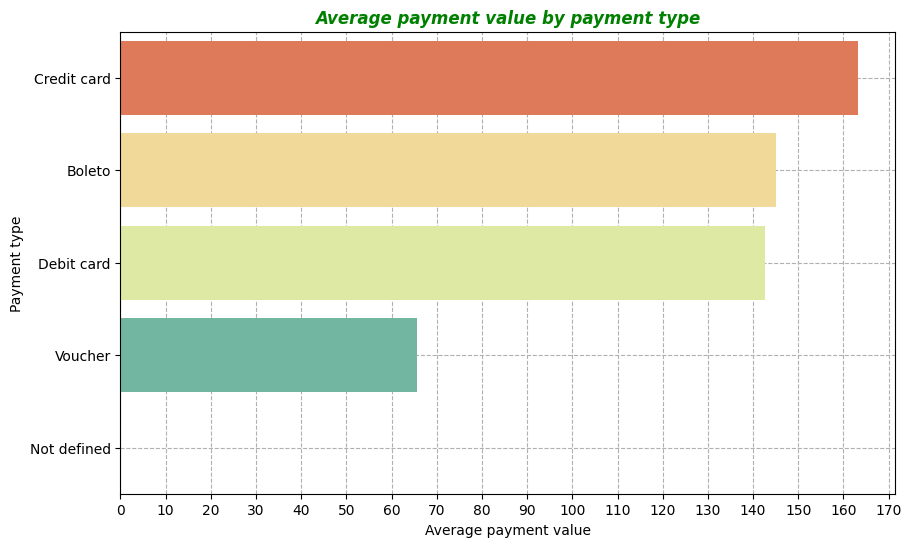

In [12]:
res=payments.groupby(["payment_type"]).agg({"payment_value":"mean"}).sort_values(by=["payment_value"], ascending=False).reset_index()

plt.figure(figsize=(10, 6))
bar2=sns.barplot(data=res, y="payment_type", x="payment_value", palette=sns.color_palette("Spectral", n_colors=4))
bar2.set_title("Average payment value by payment type", fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
bar2.set(ylabel="Payment type", xlabel="Average payment value")
bar2.set_yticklabels(["Credit card", "Boleto", "Debit card", "Voucher", "Not defined"])
bar2.set_xticks([i*10 for i in range(0, 18)])
bar2.set_axisbelow(True)
bar2.grid(linestyle="dashed")

plt.show()

## Задание 3 (25 баллов)

Обратите внимание на число платежей (payment_installments). Выясните, какая сумма оплаты указана: за целую покупку или только за ее часть? (Обратите внимание, что в данных есть определенная бага, которую нужно расследовать и учесть)

Также покажите средний чек в зависимости от числа оплат. Есть ли какая-то связь между ними?

**Комментарий**

Насколько я поняла, payment_installments - на сколько частей пользователь поделил оплату своего заказа, а payment_sequential - номер платежа в последовательности платежей в зависимости от типа оплаты (например, первый тип оплаты - по кредитке, и было сделано 2 платежа; второй тип оплаты - по ваучеру, и был сделан 1 платеж и т.д.) 

Поэтому, если у данного заказа есть несколько способов оплаты, то в одной строке с одним типом оплаты указана сумма не за всю покупку, а только за ее часть. Общая сумма, которую должен заплатить покупатель, получается при суммировании всех способов и "итераций" оплаты по данному заказу

[В этой области несостыковки, которые я нашла - это то, что payment_installments может быть равно 0, а payment_sequential может начинаться не с 1, что странно, но не особо мешает нам в этом дз.]

На мой взгляд, наибольшая бага здесь - это то, что если мы просуммируем все цены товаров и цены за доставку для каждого заказа в таблице items (назовем эту величину total_value) и сравним ее с payment_value, то эти числа не всегда будут равны.

В коде в следующей ячейке, меняя параметр diff, можно увидеть, сколько всего заказов есть с такой разницей между total_value и payment_value. Притом, судя по всему, проблема не в округлении или сравнении чисел с плававющей точкой: даже при diff==10 мы имеем список из 98 заказов.

Всего заказов с неравными payment_value и total_value 576 штук, а всего уникальных заказов в таблице payments 99440 штук. Поэтому, я думаю, можно пренебречь этими 576 заказами, и для выполнения данного задания использовать только те заказы, у которых совпадают payment_value и total_value.

In [13]:
diff=0.000001

pay31=payments.groupby(["order_id"]).agg({"payment_value":"sum"}).reset_index()
item31=items.groupby(["order_id"]).agg({"price":"sum", "freight_value":"sum"}).reset_index()
item31["total_value"]=item31["price"]+item31["freight_value"]

res31=pd.merge(item31, pay31, how="inner", on="order_id")
res31=res31.loc[(res31["payment_value"]-res31["total_value"]>diff) | (res31["total_value"]-res31["payment_value"]>diff)]
res31

,order_id,price,freight_value,total_value,payment_value
134,005d9a5423d47281ac463a968b3936fb,99.97,45.28,145.25,145.26
165,00789ce015e7e5791c7914f32bb4fad4,154.00,14.83,168.83,190.81
525,016726239765c18f66826453f39c64e3,219.99,15.14,235.13,265.77
724,01e51b7c3025655646143d09b911e1d7,19.00,14.10,33.10,35.02
965,028aa7c930356788f861ed1b7f984819,39.90,17.63,57.53,62.94
...,...,...,...,...,...
97656,fd571ab12e8d263eaf309774eedfcfeb,890.70,58.00,948.70,948.69
97808,fdb034f444a32838124d8907e443d249,18.90,12.48,31.38,33.56
97992,fe35e99a6a5d4d036bf8167d364e0792,239.60,23.00,262.60,262.59
98219,fecb65750b4fe05b8257f650b2e114a2,199.80,16.96,216.76,216.75


In [14]:
pay32=payments.groupby(["order_id"]).agg({"payment_value":"sum", "payment_installments":"sum"}).reset_index()
item32=items.groupby(["order_id"]).agg({"price":"sum", "freight_value":"sum"}).reset_index()
item32["total_value"]=item32["price"]+item32["freight_value"]

res32=pd.merge(item32, pay32, how="inner", on="order_id")
res32=res32.loc[((res32["payment_value"]-res32["total_value"]<0.00001) & (res32["total_value"]-res32["payment_value"]<0.00001))]
res32=res32.groupby(["payment_installments"]).agg({"payment_value":"mean"}).reset_index()

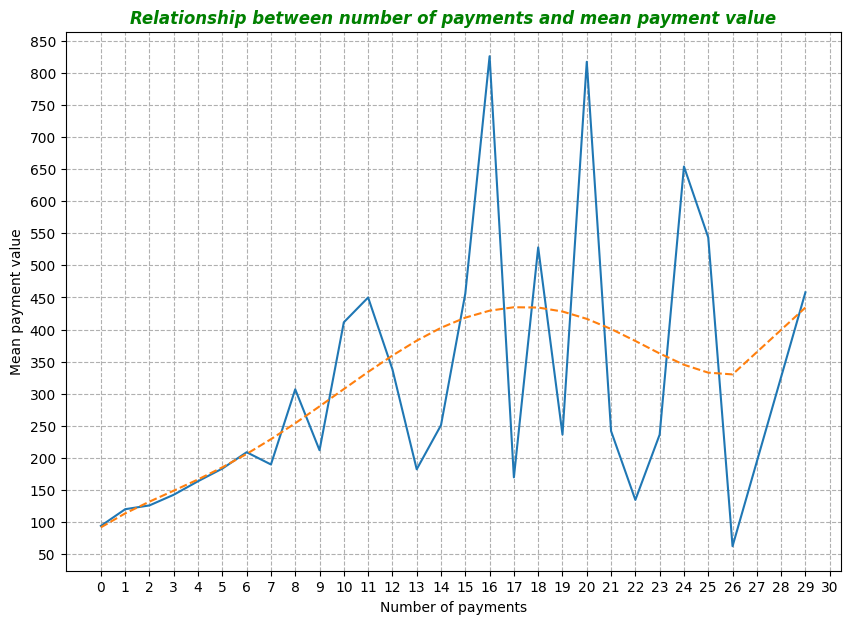

In [15]:
plt.figure(figsize=(10, 7))
line3=sns.lineplot(data=res32, x='payment_installments', y='payment_value')
line3.set(xlabel='Number of payments', ylabel='Mean payment value')
line3.set_title('Relationship between number of payments and mean payment value', fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
line3.set_xticks([i for i in range(0, 31)])
line3.set_yticks([i*50 for i in range(0, 18)])
line3.set_axisbelow(True)
line3.grid(linestyle="dashed")

z = np.polyfit (res32["payment_installments"], res32["payment_value"], 5)
p = np.poly1d(z)
trend = plt.plot(res32["payment_installments"], p(res32["payment_installments"]), linestyle='--') #Добавила тренд для наглядности

plt.show()

**Комментарий**

Можно заметить, что при увеличении числа платежей до определенного момента средний чек действительно растет, то есть наблюдается положительняа зависимость.
В целом, это логично: чем больше сумма заказа, тем на бОльшее количество долей среднестатистический покупатель  с фиксированным доходом в месяц захочет разделить стоимость покупки, чтобы позволить ее себе.

## Задание 4 (15 баллов)

Визуализируйте зависимость между ценой заказа и ценой доставки по штатам покупки. Есть ли какая-нибудь зависимость и как вы можете ее обосновать?

In [16]:
res4=orders[orders["order_status"]=="delivered"].reset_index()
res4=pd.merge(res4, customers, how='inner', on="customer_id")
res4=pd.merge(res4, items, how="inner", on="order_id")

res4=res4.groupby(["customer_state", "order_id"]).agg({"price":"sum", "freight_value":"sum"}).reset_index()

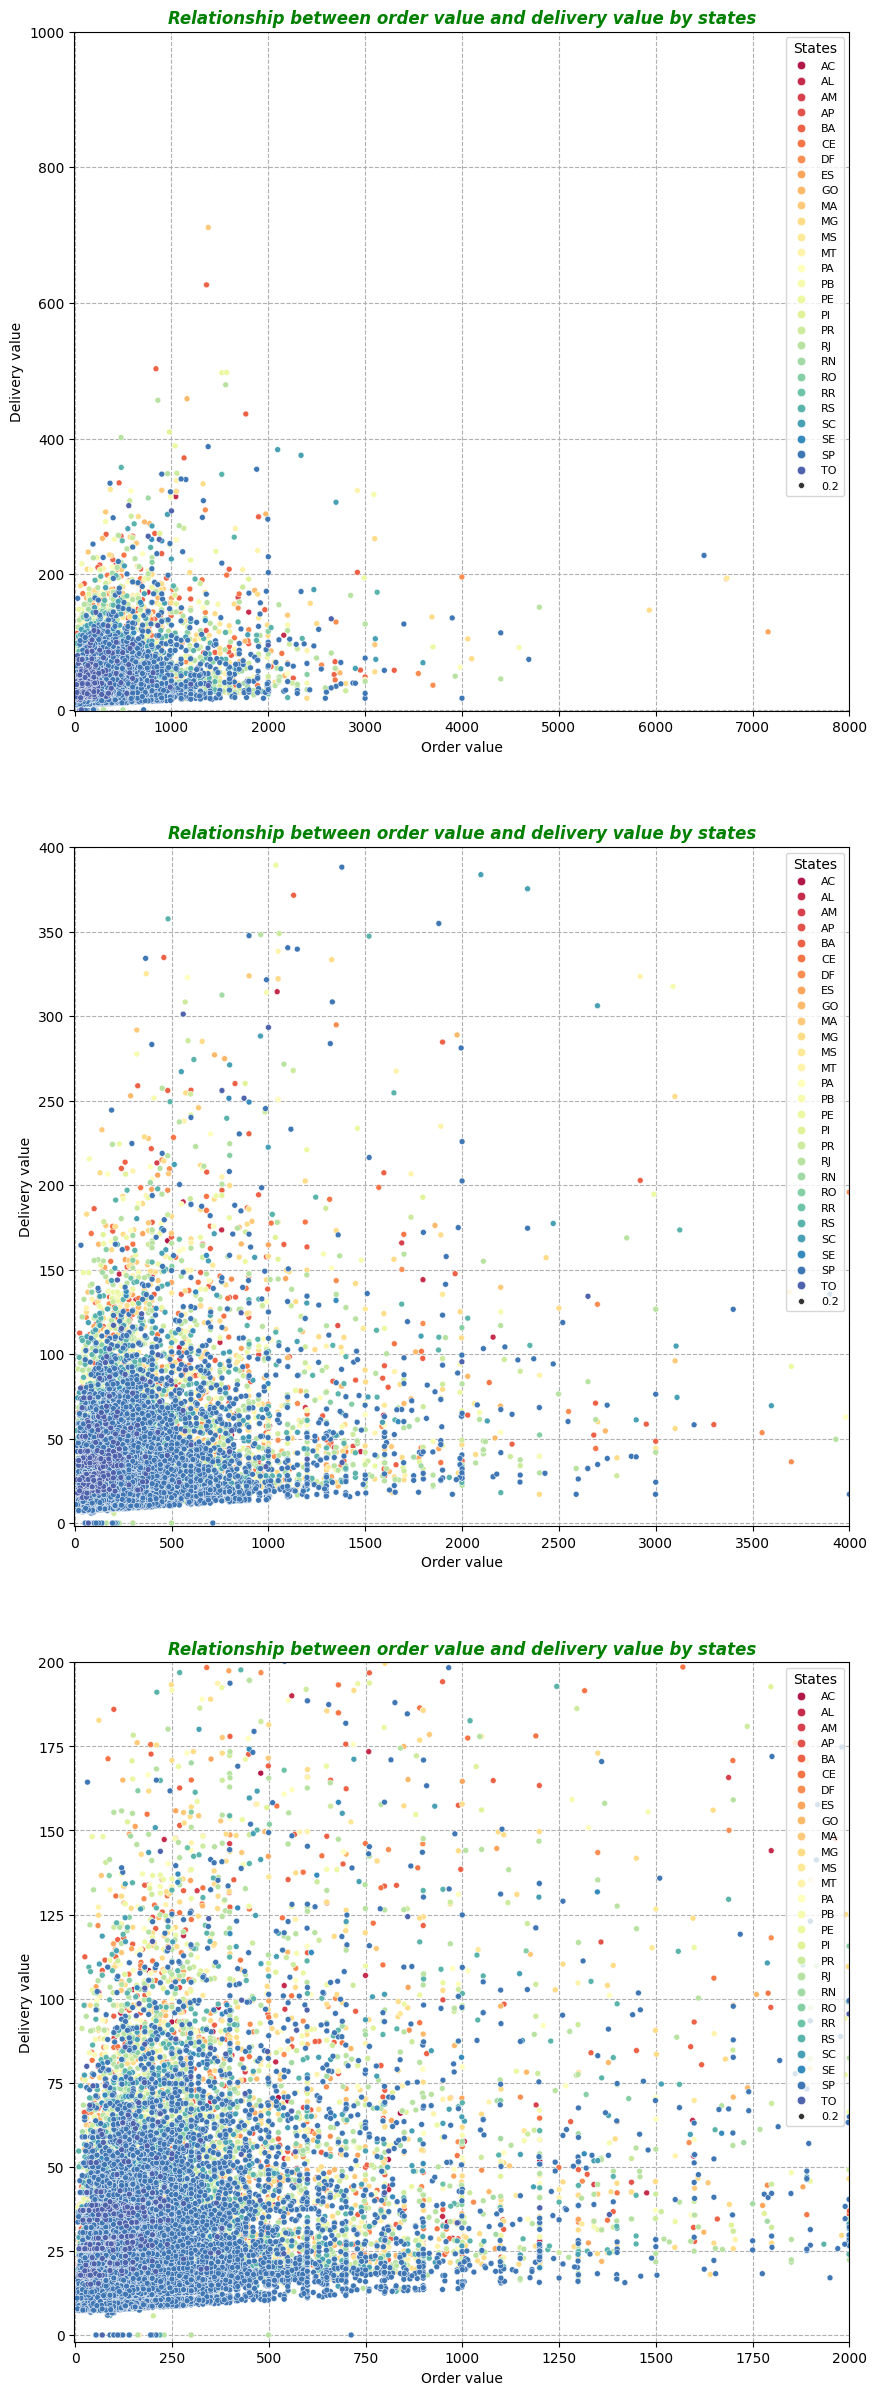

In [17]:
plt.figure(figsize=(10, 30))

plt.subplot(311)
scat41=sns.scatterplot(data=res4, x='price', y='freight_value', hue="customer_state", size=0.2, palette=sns.color_palette("Spectral", n_colors=27))
scat41.set(xlabel='Order value', ylabel='Delivery value')
scat41.set_title("Relationship between order value and delivery value by states", fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
plt.legend(title='States', fontsize='8')
scat41.set_xlim(-2, 8000)
scat41.set_ylim(-2, 1000)
scat41.set_axisbelow(True)
scat41.grid(linestyle="dashed")

plt.subplot(312)
scat42=sns.scatterplot(data=res4, x="price", y='freight_value', hue="customer_state", size=0.2, palette=sns.color_palette("Spectral", n_colors=27))
scat42.set(xlabel='Order value', ylabel='Delivery value')
scat42.set_title("Relationship between order value and delivery value by states", fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
scat42.set_xlim(-2, 4000)
scat42.set_ylim(-2, 400)
plt.legend(title='States', fontsize='8')
scat42.set_axisbelow(True)
scat42.grid(linestyle="dashed")

plt.subplot(313)
scat43=sns.scatterplot(data=res4, x='price', y='freight_value', hue="customer_state", size=0.2, palette=sns.color_palette("Spectral", n_colors=27))
scat43.set(xlabel='Order value', ylabel='Delivery value')
scat43.set_title("Relationship between order value and delivery value by states", fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
scat43.set_xlim(-2, 2000)
scat43.set_ylim(-2, 200)
plt.legend(title='States', fontsize='8')
scat43.set_axisbelow(True)
scat43.grid(linestyle="dashed")

plt.show()

**Комментарий**

На этих данных сложно уловить какую-либо зависимость. Однако на мой взгляд, внутри отдельного штата можно наблюдать отрицательную зависимость между ценой товаров в заказе и ценой доставки. Возможные объяснения:

1) Если цена заказа высокая, то возможно продавец уже вложил какую-то часть стоимости доставки в цену, и сама по себе доставка стала подешевле

2) Если цена заказа высокая, то продавец в качестве "бонуса" для потребителя снижает цену на доставку отдельной единицы товара (как в случае с покупкой оптом и в розницу)

## Задание 5 (15 баллов)

Отобразите распределение оценок для заказов, которые были доставлены вовремя и которые пришли с опозданием. Насколько влияет факт опоздания на оценку? (оценки берутся из таблицы reviews)

In [18]:
from dateutil.parser import parse
import datetime

In [19]:
ord5=orders[orders["order_status"]=="delivered"].reset_index()
ord5=ord5[["order_id", "order_delivered_customer_date", "order_estimated_delivery_date"]]

ord5['order_delivered_customer_date'] = pd.to_datetime(ord5['order_delivered_customer_date'])
ord5['order_estimated_delivery_date'] = pd.to_datetime(ord5['order_estimated_delivery_date'])
ord5["Delivery time"]=ord5['order_delivered_customer_date']<=ord5['order_estimated_delivery_date']

rev5=reviews.groupby(["order_id"]).agg({"review_score":"mean"}) #Считаю среднюю оценку заказа, т.к. некоторые заказы по каким-то причинам имеют несколько оценок

res5=pd.merge(rev5, ord5, how="inner", on="order_id")
res5.loc[res5['Delivery time']==True, 'Delivery time'] = "In time"
res5.loc[res5['Delivery time']==False, 'Delivery time'] = "Late"

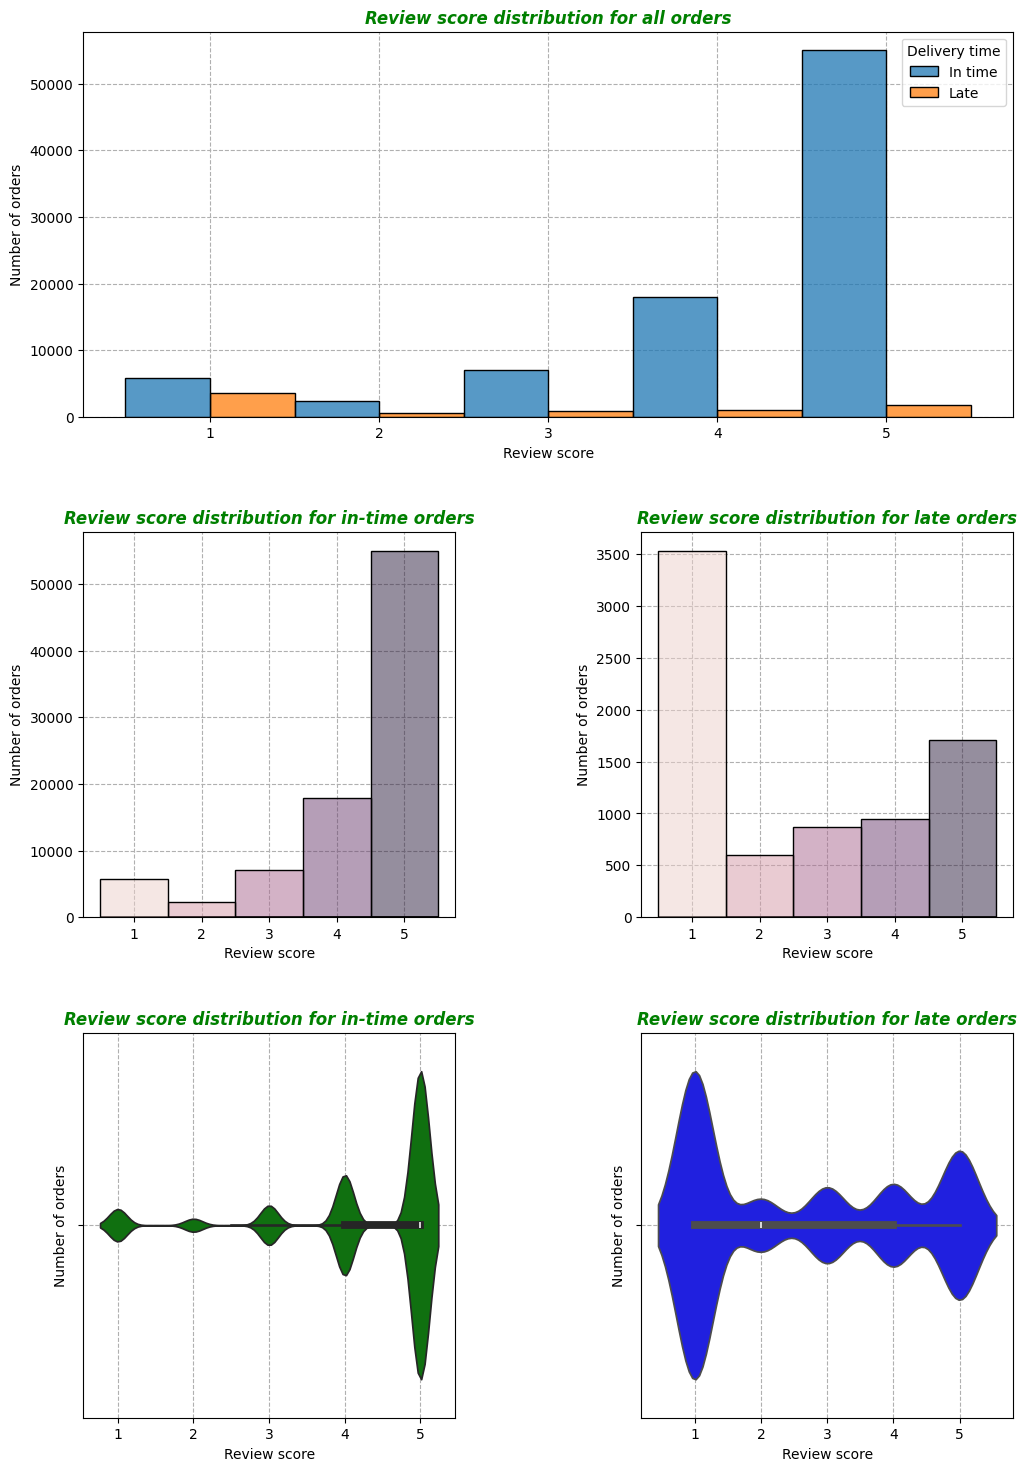

In [20]:
plt.figure(figsize=(12, 18))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

plt.subplot(311)
hist51=sns.histplot(data=res5, x="review_score", binwidth=0.5, discrete=True, multiple="dodge", hue="Delivery time")
hist51.set_title('Review score distribution for all orders', fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
hist51.set(xlabel='Review score', ylabel='Number of orders')
hist51.set_axisbelow(True)
hist51.grid(linestyle="dashed")

plt.subplot(323)
hist52=sns.histplot(data=res5[res5["Delivery time"]=="In time"], x="review_score", binwidth=0.5, discrete=True, hue="review_score")
hist52.set(xlabel='Review score', ylabel='Number of orders')
hist52.set_title('Review score distribution for in-time orders', fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
hist52.legend_.remove()
hist52.set_axisbelow(True)
hist52.grid(linestyle="dashed")

plt.subplot(324)
hist53=sns.histplot(data=res5[res5["Delivery time"]=="Late"], x="review_score", binwidth=0.5, discrete=True, hue="review_score")
hist53.set(xlabel='Review score', ylabel='Number of orders')
hist53.set_title('Review score distribution for late orders', fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
hist53.legend_.remove()
hist53.set_axisbelow(True)
hist53.grid(linestyle="dashed")

plt.subplot(325)
viol54=sns.violinplot(data=res5[res5["Delivery time"]=="In time"], x="review_score", color="green")
viol54.set(xlabel='Review score', ylabel='Number of orders')
viol54.set_title('Review score distribution for in-time orders', fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
viol54.set_axisbelow(True)
viol54.grid(linestyle="dashed")

plt.subplot(326)
viol55=sns.violinplot(data=res5[res5["Delivery time"]=="Late"], x="review_score", color="blue")
viol55.set(xlabel='Review score', ylabel='Number of orders')
viol55.set_title('Review score distribution for late orders', fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
viol55.set_axisbelow(True)
viol55.grid(linestyle="dashed")

plt.show()

**Комментарий**

Заметим, что в целом для заказов, которые были привезены вовремя, отзывы оставлялись чаще. Также по графикам видно, что примерно половина товаров, доставленных с опозданием, получили самую низку оценку. В то же время около половины товаров, доставленных вовремя, получили наивысший балл. Поэтому можно говорить о существенном влиянии опоздания на оценку.

## Задание 6 (15 баллов)

Изобразите зависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку "есть заказ из другого штата". Есть ли зависимость?

In [21]:
ord6=orders[orders["order_status"]=="delivered"]
res6=pd.merge(ord6, items, how="inner", on="order_id")
res6=pd.merge(res6, sellers, how="inner", on="seller_id")
res6=pd.merge(res6, customers, how="inner", on="customer_id")

res6["flag"]=(res6["seller_state"]!=res6["customer_state"])
res6["flag"]=res6["flag"].apply(lambda x: int(x))

res6['order_purchase_timestamp'] = pd.to_datetime(res6['order_purchase_timestamp'])
res6['order_delivered_customer_date'] = pd.to_datetime(res6['order_delivered_customer_date'])
res6["delivery_time"]=res6['order_delivered_customer_date']-res6['order_purchase_timestamp']
res6["delivery_time"]=res6["delivery_time"].apply(lambda x: x.days)

tmp=res6.groupby(["order_id"]).agg({"flag":"sum", "price":"sum"}).reset_index()
res6=res6[["order_id", "delivery_time"]].drop_duplicates(["order_id"])
res6=pd.merge(tmp, res6, how="left", on="order_id")

res6_home=res6[res6["flag"]==0]
res6_forg=res6[res6["flag"]>0]

C:\Users\User\AppData\Local\Temp\ipykernel_20160\1886458208.py:5: UserWarning: The palette list has more values (91) than needed (90), which may not be intended.
  scat61=sns.scatterplot(data=res6_home, x='delivery_time', y='price', hue="delivery_time", palette=sns.color_palette("Spectral", n_colors=91))
C:\Users\User\AppData\Local\Temp\ipykernel_20160\1886458208.py:13: UserWarning: The palette list has more values (139) than needed (138), which may not be intended.
  scat62=sns.scatterplot(data=res6_forg, x='delivery_time', y='price', hue="delivery_time", palette=sns.color_palette("Spectral", n_colors=139))
C:\Users\User\AppData\Local\Temp\ipykernel_20160\1886458208.py:21: UserWarning: The palette list has more values (91) than needed (90), which may not be intended.
  scat63=sns.scatterplot(data=res6_home, x='delivery_time', y='price', hue="delivery_time", palette=sns.color_palette("Spectral", n_colors=91))
C:\Users\User\AppData\Local\Temp\ipykernel_20160\1886458208.py:31: UserWarnin

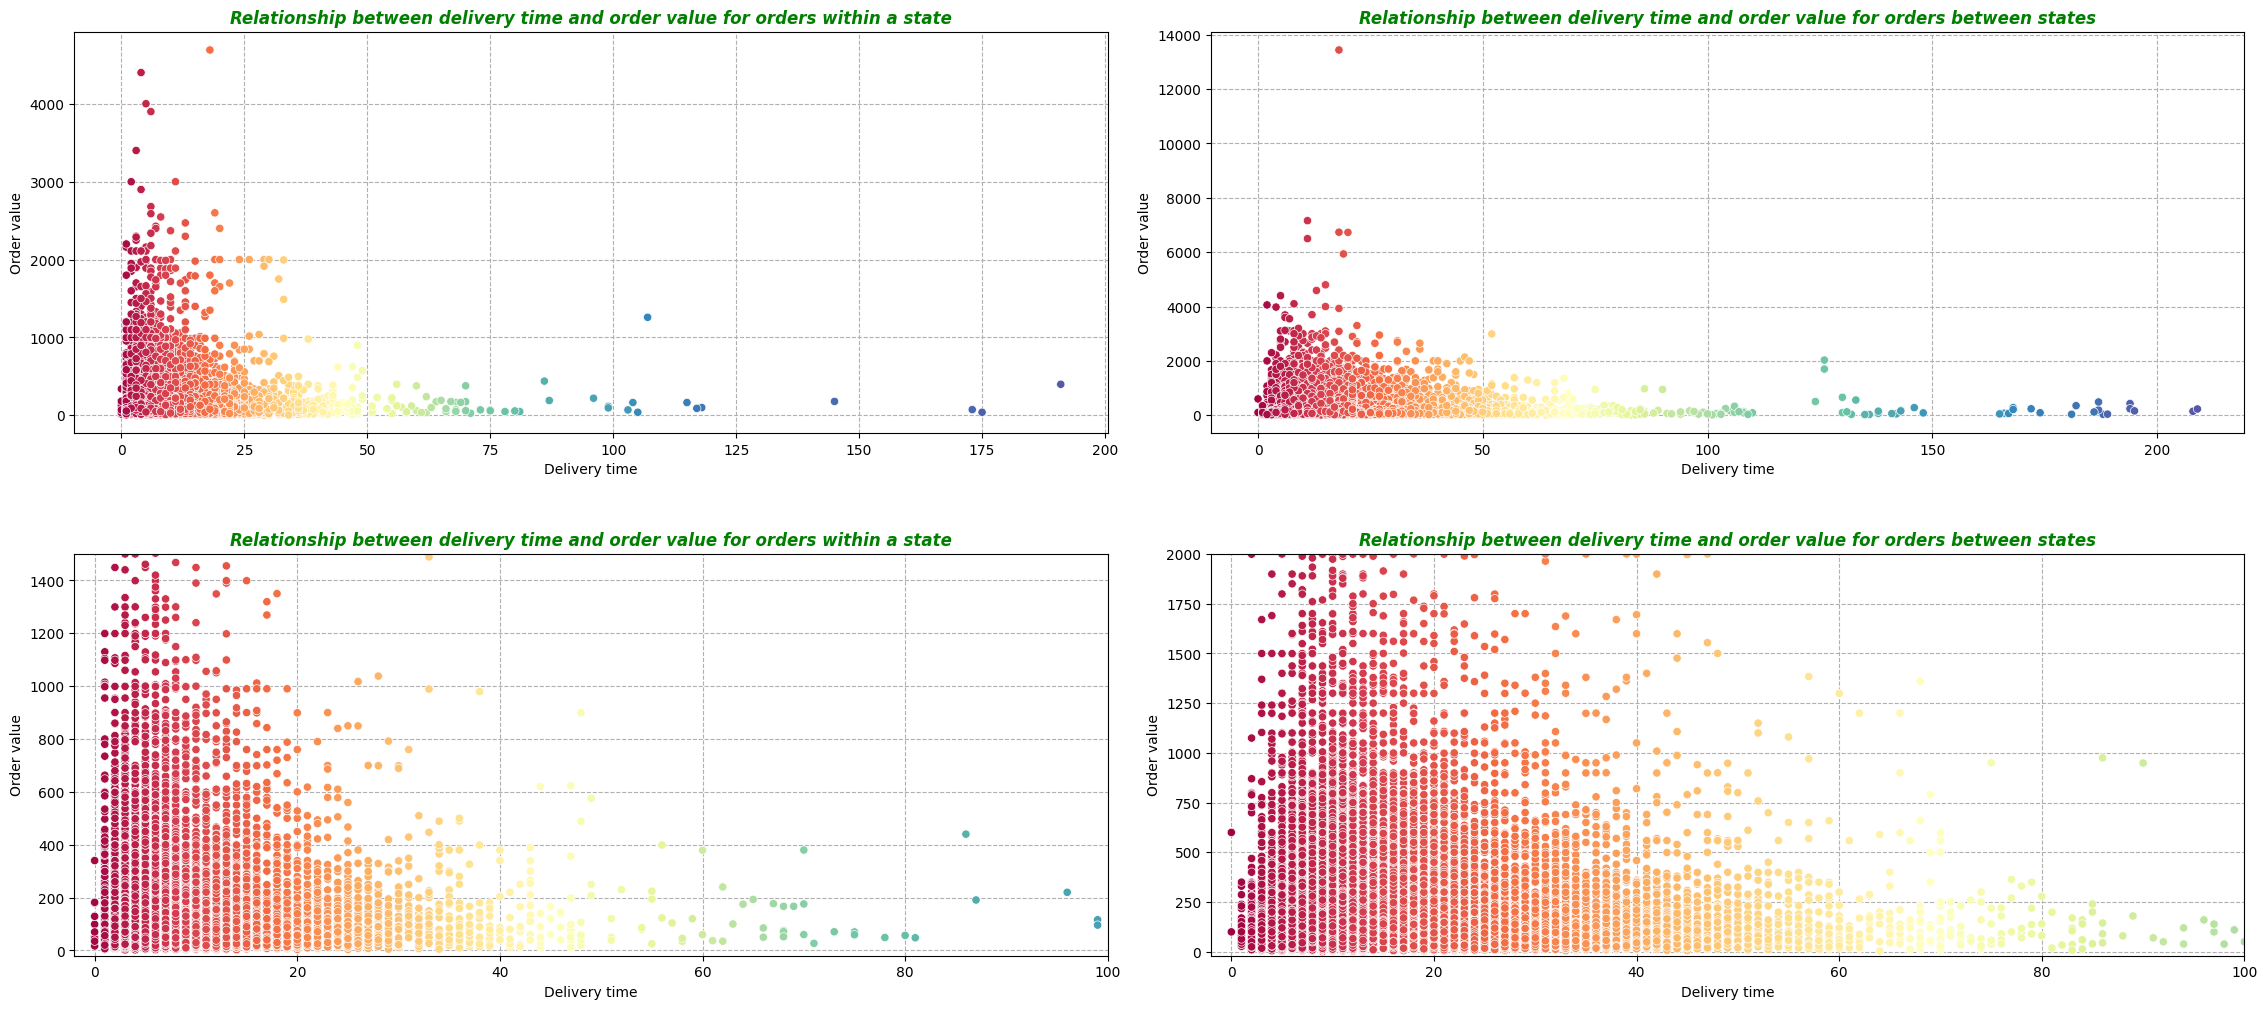

In [22]:
plt.figure(figsize=(28, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

plt.subplot(221)
scat61=sns.scatterplot(data=res6_home, x='delivery_time', y='price', hue="delivery_time", palette=sns.color_palette("Spectral", n_colors=91))
scat61.set(xlabel="Delivery time", ylabel="Order value")
scat61.set_title("Relationship between delivery time and order value for orders within a state", fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
scat61.legend_.remove()
scat61.set_axisbelow(True)
scat61.grid(linestyle="dashed")

plt.subplot(222)
scat62=sns.scatterplot(data=res6_forg, x='delivery_time', y='price', hue="delivery_time", palette=sns.color_palette("Spectral", n_colors=139))
scat62.set(xlabel="Delivery time", ylabel="Order value")
scat62.set_title("Relationship between delivery time and order value for orders between states", fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
scat62.legend_.remove()
scat62.set_axisbelow(True)
scat62.grid(linestyle="dashed")

plt.subplot(223)
scat63=sns.scatterplot(data=res6_home, x='delivery_time', y='price', hue="delivery_time", palette=sns.color_palette("Spectral", n_colors=91))
scat63.set(xlabel="Delivery time", ylabel="Order value")
scat63.set_title("Relationship between delivery time and order value for orders within a state", fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
scat63.set_xlim(-2, 100)
scat63.set_ylim(-20, 1500)
scat63.legend_.remove()
scat63.set_axisbelow(True)
scat63.grid(linestyle="dashed")

plt.subplot(224)
scat64=sns.scatterplot(data=res6_forg, x='delivery_time', y='price', hue="delivery_time", palette=sns.color_palette("Spectral", n_colors=139))
scat64.set(xlabel="Delivery time", ylabel="Order value")
scat64.set_title("Relationship between delivery time and order value for orders between states", fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})
scat64.set_xlim(-2, 100)
scat64.set_ylim(-20, 2000)
scat64.legend_.remove()
scat64.set_axisbelow(True)
scat64.grid(linestyle="dashed")

plt.show()

**Комментарий**

На графиках можно заметить отрицательную зависимость между временем доставки и стоимостью товара. Этому можно дать два логиеских объяснения:

1) покупатели имеют возможность купить один и тот же (или очень похожий) товар у разных продавцов, у котрых длительность доставки отличается; покупатели могут соглашаться на более длительную доставку, если цена товара у данного продавца оказывается ниже;

2) покупатели в среднем не хотят ждать свой заказ долго и не хотят иметь проблем с возвратом товара, если продавец находится далеко от них; поэтому дорогостоящие покупки они делают только у тех продавцов, которые доставляют товары быстро, а у продавцов издалека покупают какие-то недорогие и не очень важные вещи.